[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/qbeer/patho-segmentation-unet/blob/master/segmentation.ipynb)

In [ ]:
!git clone https://github.com/qbeer/patho-segmentation-unet
!cp -a patho-segmentation-unet/* .

In [1]:
from patho import Model, UNET, DataLoader
import numpy as np
import matplotlib.pyplot as plt

In [2]:
net = UNET()
net.make_parallel()

model = Model(net, with_jaccard=True, load_model=True)

In [3]:
data_loader = DataLoader("patho/data", "resized_images",
                         "resized_masks", batch_size=9).getInstance()

In [29]:
model.train(data_loader, EPOCH=5)

[1,    10] loss: 2.842
[1,    20] loss: 2.873
Average batch loss on epoch end : 2.78292
[2,    10] loss: 2.756
[2,    20] loss: 2.668
Average batch loss on epoch end : 2.71884
[3,    10] loss: 2.951
[3,    20] loss: 2.648
Average batch loss on epoch end : 2.76253
[4,    10] loss: 2.812
[4,    20] loss: 2.745
Average batch loss on epoch end : 2.76764
[5,    10] loss: 2.694
[5,    20] loss: 2.742
Average batch loss on epoch end : 2.75071
Finished training!


In [54]:
for imgs, masks in data_loader:
    predicted_masks = model.net(imgs).cpu().detach().numpy()
    imgs, masks = imgs.cpu().detach().numpy(), masks.cpu().detach().numpy()
    break
    
print(imgs.shape, masks.shape)
print(np.min(predicted_masks[0]), np.max(predicted_masks[0]))
print(np.min(masks[0]), np.max(masks[0]))

(9, 3, 572, 572) (9, 1, 388, 388)
1.9689895e-05 0.8752092
0.0 1.0


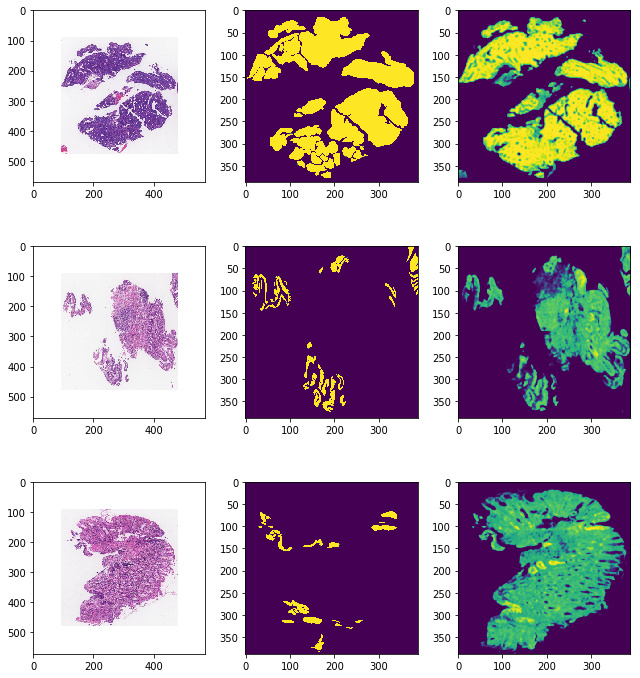

In [55]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 10))

for ind, ax in enumerate(axes.flatten(), 0):
    if ind % 3 == 0:
        ax.imshow(imgs[ind // 3].transpose((1, 2, 0)))
    elif ind % 3 == 1:
        ax.imshow(masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))
    else:
        ax.imshow(predicted_masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))

fig.tight_layout()
plt.show()

In [56]:
predicted_masks[predicted_masks >= 0.65] = 1.
predicted_masks[predicted_masks < 0.65] = 0.

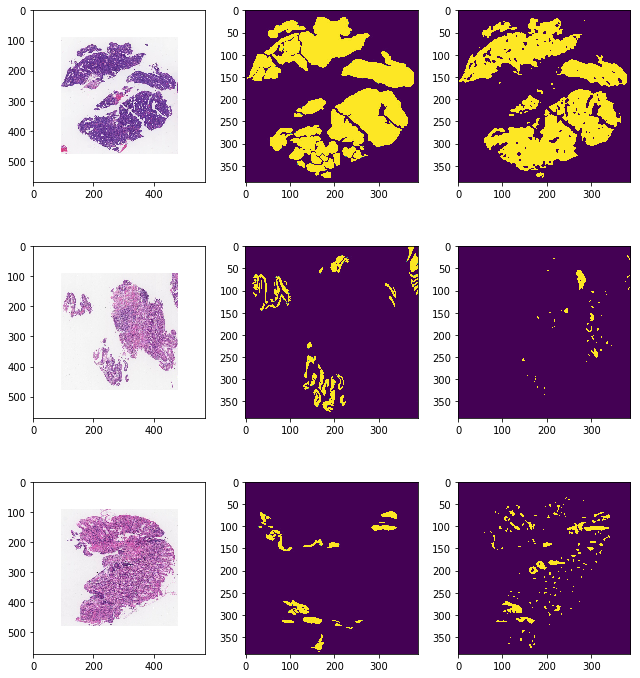

In [57]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 3, figsize=(9, 10))

for ind, ax in enumerate(axes.flatten(), 0):
    if ind % 3 == 0:
        ax.imshow(imgs[ind // 3].transpose((1, 2, 0)))
    elif ind % 3 == 1:
        ax.imshow(masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))
    else:
        ax.imshow(predicted_masks[ind // 3].transpose((1, 2, 0)).reshape(388, 388))

fig.tight_layout()
plt.show()